# Un peu d'apprentissage automatique avec NumPy

Nous allons effectuer un petit peu d'apprentissage automatique, qui est une sous-branche de l'intelligence artificielle, pour illustrer l'utilisation du paquet `numpy`.

In [544]:
import matplotlib.pyplot as plt
import numpy as np

## Régression linéaire simple

Supposons que l'on a une variable d'intérêt $y \in \mathbb{R}$, qui est continue, que l'on cherche à prédire à partir d'une variable en entrée continue $x \in \mathbb{R}$.
On dispose de $n$ observations, qui sont représentées par le vecteur $\mathbf{x} \in \mathbb{R}^n$ contenant les entrées et le vecteur $\mathbf{y} \in \mathbb{R}^n$ contenant les sorties.
On utilise la fonction [`sklearn.datasets.make_regression()`](https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.make_regression.html) pour générer un tel jeu de données :

In [545]:
from sklearn.datasets import make_regression

x_lin_sim, y_lin_sim = make_regression(
    n_samples=40, n_features=1, n_informative=1, bias=2.0, noise=40, random_state=42
)

x_lin_sim = x_lin_sim.ravel()

Deux variables Python ont été créées :
* `x_lin_sim` correspond au vecteur $\mathbf{x}$ contenant les entrées,
* `y_lin_sim` correspond au vecteur $\mathbf{y}$ contenant les sorties.

**Question 1 : Affichez les données avec un graphique adapté.**

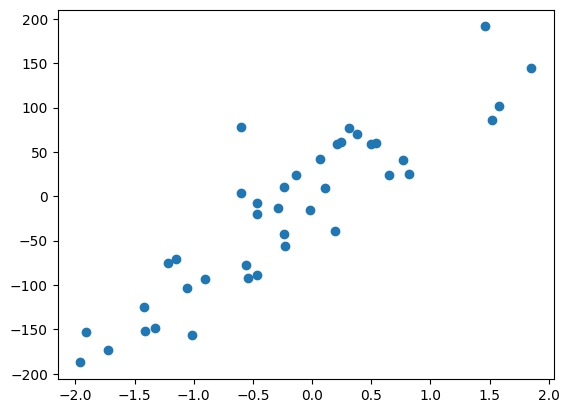

In [546]:
plt.scatter(x_lin_sim, y_lin_sim)
plt.show()

La régression linéaire simple fait l'hypothèse que la relation entre la variable d'intérêt et la variable en entrée est modélisée par une relation linéaire :

$$
    y \approx a x + b
$$

Pour estimer le coefficient $a$ et la constante $b$, on utilise le critère de la somme des moindres carrés :

$$
    a^*, b^* = \arg\min_{a, b} \sum_{i=1}^n \left( y^{(i)} - (a x^{(i)} + b) \right)^2
$$

Les solutions à ce problème d'optimisation (obtenues en cherchant quand le gradient de cette fonction est nul) sont les suivantes :

$$
    a^* = \frac{cov(x, y)}{var(x)} = \frac{\sum_{i=1}^n (x^{(i)} - \bar{x}) (y^{(i)} - \bar{y})}{\sum_{i=1}^n (x^{(i)} - \bar{x})^2} \qquad\text{et}\qquad b^* = \bar{y} - a^* \bar{x}
$$

avec :

$$
    \bar{x} = \frac{1}{n} \sum_{i=1}^n x^{(i)} \qquad\text{et}\qquad \bar{y} = \frac{1}{n} \sum_{i=1}^n y^{(i)}
$$

**Question 2 : Calculez les solutions de la régression linéaire simple pour ce jeu de données avec les formules fournies ci-dessus.**

In [547]:
cov = np.cov(x_lin_sim, y_lin_sim)

a = cov[0, 1] / np.sqrt(cov[0, 0])
x_mean, y_mean = np.mean(x_lin_sim), np.mean(y_lin_sim)
b = y_mean - a * x_mean
a, b

(np.float64(82.81678564176232), np.float64(0.13084325931008323))

**Question 3 : Affichez la régression linéaire simple optimale avec le jeu de données.**

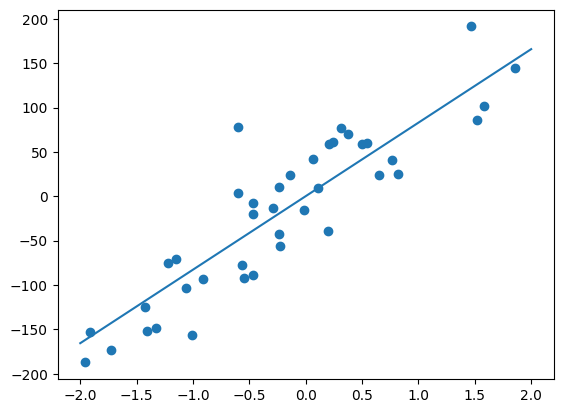

In [548]:
plt.scatter(x_lin_sim, y_lin_sim)
plt.plot([-2, 2], [a * x + b for x in [-2, 2]])
plt.show()


## Régression linéaire multiple

Passons maintenant à un cas plus complexe, mais plus réaliste, avec la régression linéaire multiple.
En effet, il est irréaliste dans l'immense majorité des cas d'espérer pouvoir prédire la variable d'intérêt $y$ avec une seule variable en entrée.

On suppose maintenant que chaque entrée n'est plus un réel $x^{(i)} \in \mathbb{R}$ mais un vecteur de nombre réels $\mathbf{x}^{(i)} \in \mathbb{R}^p$.
À chaque entrée $\mathbf{x}_i$ est toujours associée une sortie $y^{(i)} \in \mathbb{R}$.
Les entrées sont représentées par la matrice $\mathbf{X} \in \mathbb{R}^{n \times d}$ et les sorties sont représentées par le vecteur $\mathbf{y} \in \mathbb{R}^{n}$.

On utilise à nouveau la fonction [`sklearn.datasets.make_regression()`](https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.make_regression.html) pour générer un tel jeu de données :

In [549]:
X_lin, y_lin = make_regression(
    n_samples=40, n_features=10, n_informative=8, bias=70.0, noise=40, random_state=42
)

Deux variables Python ont été créées :
* `X_lin` correspond à la matrice $\mathbf{X}$ contenant les entrées,
* `y_lin` correspond au vecteur $\mathbf{y}$ contenant les sorties.

La régression linéaire multiple fait l'hypothèse que la relation entre la variable d'intérêt et les variables en entrée est modélisée par une relation linéaire :

$$
    y \approx w_0 + \sum_{j=1}^p w_i x_i
$$

Une manière courante de rajouter la constante est de rajouter une variable supplémentaire qui vaut 1, c'est-à-dire une colonne de 1 à la matrice $\mathbf{X}$ :

$$
    y \approx \sum_{j=0}^p w_i x_i = \mathbf{w}^\top \mathbf{x}
$$

**Question 4 : Ajoutez une colonne de 1 en tant que dernière colonne à la matrice `X_log` pour modéliser la constante.**

In [550]:
X_log = np.zeros((X_lin.shape[0], X_lin.shape[1]+1))
for i in range(X_log.shape[0]):
    X_log[i] = np.concat([X_lin[i], [1]])
X_log

array([[-0.90938745, -0.99053633,  2.19045563,  0.09965137,  0.58685709,
         1.40279431, -0.56629773,  0.79103195, -1.40185106, -0.50347565,
         1.        ],
       [ 1.53273891,  0.22409248, -0.40122047,  0.0976761 ,  0.69014399,
        -0.10876015,  0.0125924 ,  0.51934651,  0.40171172, -0.77300978,
         1.        ],
       [ 1.09877685,  0.68195297,  0.02100384,  0.32416635,  1.30547881,
         0.82541635, -0.31026676, -0.2176812 ,  0.81350964, -0.13014305,
         1.        ],
       [ 0.7870846 ,  0.82206016,  0.41278093, -0.24538812,  0.96337613,
         1.15859558,  1.89679298, -0.97468167, -0.82068232, -0.75373616,
         1.        ],
       [-0.05952536,  1.6324113 , -1.24778318, -0.44004449, -0.25256815,
        -3.24126734, -1.43014138, -0.92693047, -1.02438764,  0.13074058,
         1.        ],
       [-0.49300093,  0.89959988, -0.6929096 ,  0.81286212,  0.35701549,
        -0.58936476,  0.30729952, -0.20812225,  0.8496021 ,  0.62962884,
         1.   

On utilise toujours le critère de la somme des moindres carrés pour trouver les paramètres optimaux :

$$
    \mathbf{w}^* = \arg\min_{\mathbf{w}} \sum_{i=1}^n \left( y^{(i)} - \mathbf{w}^\top \mathbf{x}_i \right)^2
    = \arg\min_{\mathbf{w}} \Vert \mathbf{y} - \mathbf{X} \mathbf{w} \Vert_2^2
$$

En déterminant quand le gradient de cette fonction s'annule, on obtient le système d'équations linéaires suivant :

$$
    \mathbf{X}^\top \mathbf{X} \mathbf{w}^* = \mathbf{X}^\top \mathbf{y}
$$

**Question 5 : Utilisez la fonction [`numpy.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) pour trouver les paramètres optimaux de la régression linéaire multiple des moindres carrés.**

In [551]:
w = np.linalg.solve(np.transpose(X_log) @ X_log, np.transpose(X_log) @ y_lin)
w

array([ 46.43604294, 101.35292776, 115.75434646,   8.82386061,
        88.43342156,   4.32898953,  68.90252653,  42.73233419,
        81.27774003,   9.40551868,  69.15219343])

**Question 6 : Calculez la racine carrée de l'erreur quadratique moyenne entre les vraies sorties et les sorties prédites.**

In [552]:
np.sqrt(np.mean(np.square(y_lin - [np.transpose(w)@X_log[i] for i in range(X_log.shape[0])])))

np.float64(38.2897976385596)

Quand on fait de l'apprentissage automatique supervisé, on souhaite évaluer le modèle sur un jeu de données indépendant du jeu d'entraînement.

**Question 7 : Utilisez la classe [`sklearn.model_selection.ShuffleSplit()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) pour séparer 10 fois le jeu de données complet en un jeu d'entraînement avec 80% des observations et un jeu d'évaluation avec 20% des observations, répondre à nouveau aux questions 4 et 5 et calculer la moyenne des racines carrées des erreurs quadratiques moyennes. Comparez le score obtenu ici avec celui obtenu à la question précédente.**

In [553]:
import sklearn
import sklearn.model_selection

meqm = np.array([])
rs = sklearn.model_selection.ShuffleSplit(n_splits=10, test_size=0.2, train_size=0.8)

for id_train, id_test in rs.split(X_lin):
    X_log = np.zeros((X_lin.shape[0], X_lin.shape[1]+1))
    for i in range(X_log.shape[0]):
        X_log[i] = np.concat([X_lin[i], [1]])
    X_train, y_train = X_log[id_train], y_lin[id_train]
    X_test, y_test = X_log[id_test], y_lin[id_test]
    w = np.linalg.solve(np.transpose(X_train) @ X_train, np.transpose(X_train) @ y_train)
    eqm = np.sqrt(np.mean(
        np.square(y_test - [np.transpose(w)@X_test[i] for i in range(X_test.shape[0])])
        ))
    meqm = np.append(meqm, eqm)

print(np.mean(meqm))

55.680133399936096


## Régression logistique

La régression logistique est un modèle linéaire pour des tâches de classification binaire.
L'objectif n'est pas de prédire un nombre réel mais une classe parmi deux choix possibles (par exemple *malade* ou *sain* dans le domaine médical).
L'algorithme s'étend aux tâches de classification multiclasse, c'est-à-dire avec un nombre de classes strictement plus grand que deux, mais nous nous limiterons à la classification binaire ici.

Un modèle linéaire de classification binaire sépare l'espace en deux sous-espaces par un hyperplan.
En classification binaire, on fait souvent référence aux deux classes par les termes *classe positive* et *classe négative*.

Le modèle prédit comme :

* observation positive tout point du plan dont la distance signée à l'hyperplan est positive, et
* observation négative tout point du plan dont la distance signée à l'hyperplan est négative.


### Cas où les classes sont linéairement séparables

Tout d'abord, on utilise la fonction [`sklearn.datasets.make_classification()`](https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.make_classification.html) pour créer un jeu de données avec seulement deux variables en entrée pour pouvoir facilement visualiser le jeu de données :

In [554]:
from sklearn.datasets import make_classification

X_log_sep, y_log_sep = make_classification(
    n_samples=40, n_features=2, n_informative=2, n_repeated=0, n_redundant=0,
    n_clusters_per_class=1, flip_y=0, class_sep=2, random_state=42,
)

Deux variables Python ont été créées :
* `X_log_sep` correspond à la matrice $\mathbf{X}$ contenant les entrées,
* `y_log_sep` correspond au vecteur $\mathbf{y}$ contenant les sorties (c'est-à-dire les classes, $0$ ou $1$).

**Question 8 : Effectuez une visualisation du jeu de données. Est-ce que les classes sont linéairement séparables ?**

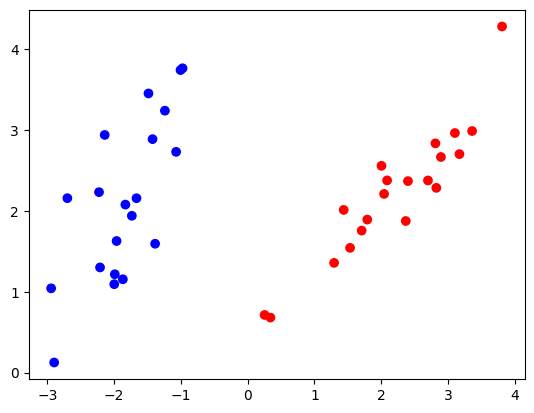

In [555]:
couleur = ["Blue", "Red"]
plt.scatter(X_log_sep[:, 0], X_log_sep[:, 1], c= [couleur[y_log_sep[i]] for i in range(
    len(y_log_sep))])
plt.show()

#On voit que l'on peut bien séparer par une droite (hyperplan d'un plan)

Pour un hyperplan caractérisé par le vecteur $\mathbf{w}$, la distance signée d'un point $\mathbf{x}$ à l'hyperplan est le produit scalaire entre les deux vecteurs :

$$
    f(\mathbf{x}; \mathbf{w}) = \mathbf{w}^\top \mathbf{x}
$$

On fait encore l'hypothèse d'avoir rajouter une variable supplémentaire au vecteur $\mathbf{x}$ contenant un `1` pour modéliser la constante.

**Question 9 : Ajoutez une colonne de 1 en tant que dernière colonne à la matrice `X_log_sep` pour modéliser la constante.**

In [556]:
X_log_sep1 = np.zeros((X_log_sep.shape[0], X_log_sep.shape[1]+1))
for i in range(X_log_sep1.shape[0]):
    X_log_sep1[i] = np.concat([X_log_sep[i], [1]])
X_log_sep1

array([[-1.96259284,  1.62791978,  1.        ],
       [ 2.89271151,  2.66720887,  1.        ],
       [-2.14023242,  2.94011225,  1.        ],
       [ 2.08715287,  2.3780688 ,  1.        ],
       [ 3.10218314,  2.96355102,  1.        ],
       [-2.89683611,  0.12536461,  1.        ],
       [ 2.69908359,  2.37672067,  1.        ],
       [-0.97450322,  3.76471032,  1.        ],
       [-1.73412927,  1.93979683,  1.        ],
       [-1.99748262,  1.09386894,  1.        ],
       [ 1.43719629,  2.0124542 ,  1.        ],
       [ 3.1698156 ,  2.70293455,  1.        ],
       [-1.98891498,  1.21647384,  1.        ],
       [ 1.53278573,  1.5431111 ,  1.        ],
       [ 1.29352021,  1.35742174,  1.        ],
       [-1.86872195,  1.15460857,  1.        ],
       [-1.38584899,  1.59410841,  1.        ],
       [ 1.78986266,  1.89280598,  1.        ],
       [ 3.80793436,  4.28151757,  1.        ],
       [ 1.70643145,  1.7567601 ,  1.        ],
       [-2.69930829,  2.15785865,  1.   

La régression logistique est un modèle probabiliste avec l'hypothsèse suivante :

$$
    P(y=1 \vert \mathbf{x}) = \sigma \left( \mathbf{w}^\top \mathbf{x} \right)
$$

où $\sigma$ est la fonction sigmoïde définie par :

$$
    \sigma(x) = \frac{1}{1 + \exp(-x)}
$$

**Question 10 : Définissez une fonction `sigmoid()` qui prend en argument un tableau NumPy et qui renvoie le tableau NumPy de même forme où la fonction sigmoïde a été appliquée à chaque élément du tableau.**

In [ ]:
def sigma(x):
    return 1/(1 + np.exp(-x))

def sigmoid(tab):
    res = np.zeros(np.shape(tab))
    for i in range(len(res)):
        for j in range(len(res[i])):
            res[i,j] = sigma(tab[i,j])
    return res

Pour trouver les paramètres optimaux (l'hyperplan $\mathbf{w}$), on cherche encore à minimiser une fonction de coût notée $J$ :

$$
    \mathbf{w}^* = \arg\min_{\mathbf{w}} J(\mathbf{w})
$$

On utilise l'[entropie croisée](https://fr.wikipedia.org/wiki/Entropie_croisée) comme critère :

$$
    J(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n - y^{(i)} \log \left( \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \right)
$$

Le gradient de cette fonction par rapport à $\mathbf{w}$ est noté $\nabla_{\mathbf{w}} J$ :

$$
    \nabla_{\mathbf{w}} J(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n \left( \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) - y^{(i)} \right) \mathbf{x}^{(i)}
$$

Il n'existe pas d'[expression de forme fermée](https://fr.wikipedia.org/wiki/Expression_de_forme_fermée) pour résoudre l'équation $\nabla_{\mathbf{w}} J(\mathbf{w}) = 0$.
On va donc implémenter à la place une [descente du gradient](https://fr.wikipedia.org/wiki/Algorithme_du_gradient) pour trouver les paramètres optimaux.

* Paramètres :
    + `X` : matrice des entrées
    + `y` : vecteur des sorties
    + `max_iter` : nombre maximum d'itérations
    + `tol` : tolerance (sur la norme infinie du gradient)
    + `lr` : taux d'apprentissage $\eta$
* Initialiser les coefficients à 0 : $\mathbf{w}^{(0)}$
* Calculer le gradient $\nabla_{\mathbf{w}} J(\mathbf{w}^{(0)})$
* Si la norme infinie du gradient est inférieure à `tol`
    + Renvoyer les résultats : l'initialisation convient
* Tant que le nombre maximum d'itérations n'est pas atteint
    + Mettre à jour les coefficients avec la formule suivante : $\mathbf{w}^{(t)} = \mathbf{w}^{(t-1)} - \eta \times \nabla_{\mathbf{w}} J(\mathbf{w}^{(t-1)})$
    + Calculer le gradient $\nabla_{\mathbf{w}} J(\mathbf{w}^{(t)})$
    + Si la norme infinie du gradient est inférieure à `tol`
        - Arrêter
* Renvoyer les coefficients, si l'algorithme a convergé et le nombre d'itérations effectuées.

Pour rappel, la norme infinie d'un vecteur est définie par :
$$
    \Vert \mathbf{x} \Vert_{\infty} = \max_{j} \vert x_j \vert
$$

**Question 11 : Définissez une fonction `norm()` qui renvoie la norme infinie d'un tableau NumPy.**

In [558]:
def norm(x):
    return np.max(np.abs(x))

**Question 12 : Définissez une fonction `gradient_logistic_regression()` qui prend en arguments la matrice des entrées $\mathbf{X}$, le vecteur des sorties $\mathbf{y}$ et le vecteur des coefficients $\mathbf{w}$, et qui renvoie le gradient $\nabla_{\mathbf{w}} J(\mathbf{w})$.**

In [ ]:
def gradient_logistic_regression(X, y, w):
    res = np.zeros(len(X[0]))
    for i in range(len(X)):
        res += (sigma(np.transpose(w)@X[i])-y[i])*X[i]
    return 1/len(X) * res
gradient_logistic_regression(X_log_sep1, y_log_sep, np.zeros(3))

array([-1.00830197, -0.0245948 ,  0.        ])

**Question 13 : Définissez une fonction `gradient_descent()` qui implémente l'algorithme de descente de gradient défini ci-dessus et qui renvoie un dictionnaire avec les informations suivantes :**

* La clé `'coef'` a pour valeur les coefficients obtenus à la dernière itération effectuée.
* La clé `'convergé'` a pour valeur un booléen indiquant si l'algorithme a convergé ou non.
* La clé `'n_iter'` a pour valeur le nombre d'itérations effectuées.

In [560]:
def gradient_descent(X, y, max_iter, tol, lr):
    n_iter = 0
    cv = False
    w = np.zeros(len(X[0]))
    if norm(gradient_logistic_regression(X, y, w)) <= tol:
        return {'coef':w, 'convergé': True, 'n_iter': 0}
    while n_iter < max_iter:
        n_iter += 1
        w -= lr * gradient_logistic_regression(X, y, w)
        if norm(gradient_logistic_regression(X, y, w)) <= tol:
            cv = True
            break
    return {'coef':w, 'convergé': cv, 'n_iter': n_iter}

**Question 14 : Appelez la fonction `gradient_descent()` avec les valeurs suivantes : `max_iter=10_000, tol=1e-4` et le taux d'apprentissage `lr` prenant ses valeurs dans `[10.0 ** k for k in range(-3, 3)]`. Sauvegardez les résultats dans un seul dictionnaire dont les clés sont les valeurs du taux d'apprentissage.**

In [597]:
res = {}
for lr in [10**k for k in range(-3, 3)]:
    res[lr] = gradient_descent(X_log_sep1, y_log_sep, 10_000, 1e-4, lr)
res

{0.001: {'coef': array([ 1.79174023, -0.18695573,  0.10819822]),
  'convergé': False,
  'n_iter': 10000},
 0.01: {'coef': array([ 3.30807839, -0.40686422,  0.92323874]),
  'convergé': False,
  'n_iter': 10000},
 0.1: {'coef': array([ 5.24881702, -0.90077337,  2.72648152]),
  'convergé': False,
  'n_iter': 10000},
 1: {'coef': array([ 7.30800464, -1.52096976,  4.76499549]),
  'convergé': True,
  'n_iter': 9334},
 10: {'coef': array([11.39575371,  0.40306796,  2.35887419]),
  'convergé': True,
  'n_iter': 860},
 100: {'coef': array([100.83019664,   2.45947964,   0.        ]),
  'convergé': True,
  'n_iter': 1}}

**Question 15 : Définissez une fonction `plot_decision_functions()` qui affiche sur un même graphique 6 figures, où chaque figure affiche le jeu de données et l'hyperplan appris de la régression logistique pour ce taux d'apprentissage. Indiquez dans le titre de chaque sous-figure les informations pertinentes.**

In [603]:
def plot_decision_functions(X, y, res):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
    for i, lr in enumerate(res.keys()):
        x = [-3, 4]
        coeff = res[lr]['coef']
        sol1 = np.linalg.solve(np.array([[coeff[0], coeff[1]],
                                  [1, 0]]),
                        np.array([-coeff[2], x[0]])
                        )
        sol2 = np.linalg.solve(np.array([[coeff[0], coeff[1]],
                                  [1, 0]]),
                        np.array([-coeff[2], x[1]])
                        )
        axes[i//3, i%3].scatter(
            X[:,0],
            X[:,1],
            c= ([couleur[y_log_sep[i]] for i in range(len(y_log_sep))])
            )
        axes[i//3, i%3].plot(x, [sol1[1], sol2[1]])
        axes[i//3, i%3].set_ylim((-1, 5))

**Question 16 : Appelez cette fonction. Que constatez-vous ?**

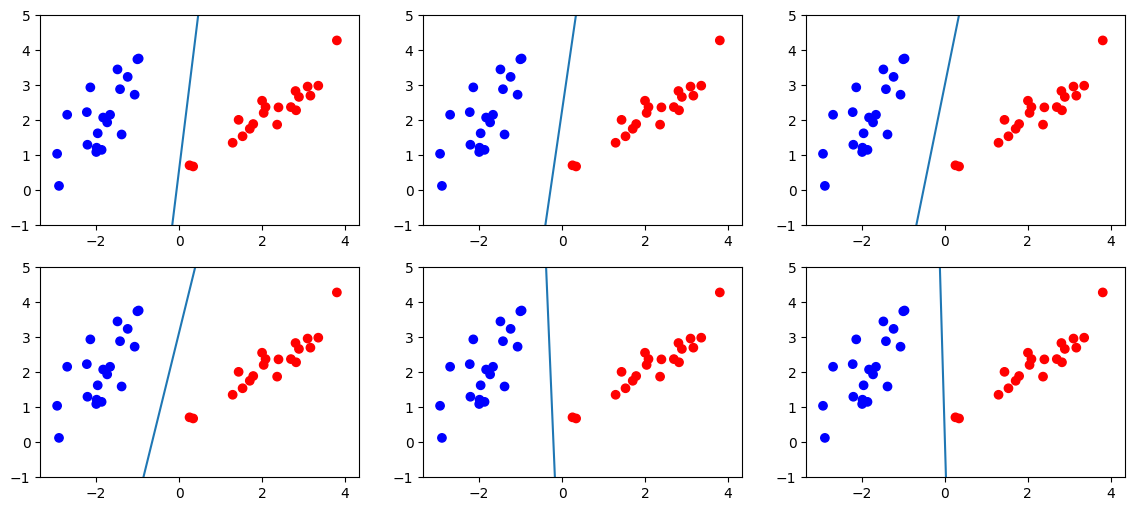

In [604]:
plot_decision_functions(X_log_sep, y_log_sep, res)

**Question 17 : Définissez une fonction `accuracy()` qui prend en arguments la matrice des entrées $\mathbf{X}$, le vecteur des sorties $\mathbf{y}$ et le vecteur des coefficients $\mathbf{w}$, et qui renvoie la proportion de bonnes prédictions effectuées par le modèle.** 

In [ ]:
# TODO

**Question 18 : Utilisez cette fonction pour vérifier que la proportion de bonnes prédictions effectuées par chacun des modèles est bien égale à 1.**

In [ ]:
# TODO

### Cas où les classes ne sont pas linéairement séparables

On s'intéresse maintenant au cas plus réaliste où les classes ne sont pas linéairement séparables.
On utilise à nouveau la fonction [`sklearn.datasets.make_classification()`](https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.make_classification.html) pour créer un tel jeu de données :

In [ ]:
X_log, y_log = make_classification(
    n_samples=40, n_features=2, n_informative=2, n_repeated=0, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.2, class_sep=0.8, random_state=42,
)

**Question 19 : Effectuez une visualisation du jeu de données. Est-ce que les classes ne sont pas linéairement séparables ?**

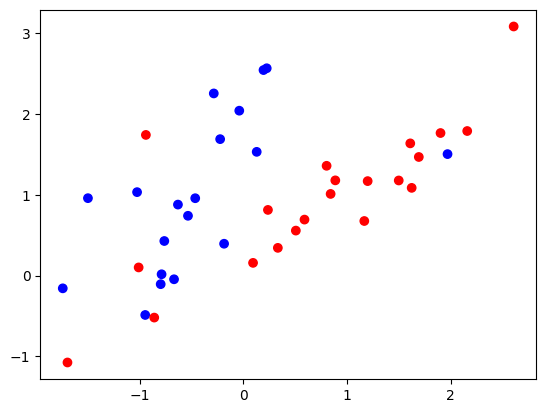

In [ ]:
couleur = ["Blue", "Red"]
plt.scatter(X_log[:, 0], X_log[:, 1], c= [couleur[y_log[i]] for i in range(
    len(y_log))])
plt.show()

**Question 20 : Ajoutez une colonne de 1 en tant que dernière colonne à la matrice `X_log` pour modéliser la constante.**

In [ ]:
# TODO

**Question 21 : Répétez les questions 14 et 16 pour ce jeu de données.**

In [ ]:
# TODO


On constate que le taux d'apprentissage est un hyperparamètre important car :

* s'il est trop élevé, l'algorithme ne vas pas converger (vers la valeur optimale), et
* s'il est trop faible, l'algorithme va mettre trop de temps à converger.

Il existe une borne supérieure qui permet d'affirmer que si le taux d'apprentissage est inférieur à cette borne supérieure, alors l'algorithme converge forcément (avec assez d'itérations) vers la solution optimale.
Cette borne supérieure est l'inverse de la plus grande valeur propre de la matrice hessienne de la fonction de coût.

La matrice hessienne de la fonction de coût est :
$$
    \nabla_{\mathbf{w}}^2 J(\mathbf{w}) 
    = \frac{1}{n} \sum_{i=1}^n \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \left( 1 - \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \right) \mathbf{x}^{(i)} \mathbf{x}^{(i)\top}
    = \frac{1}{n} \mathbf{X}^\top \mathbf{D} \mathbf{X}
    \qquad\text{avec}\qquad
    \mathbf{D} = \text{diag}\left( \left[ \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \left( 1 - \sigma \left( \mathbf{w}^\top \mathbf{x}^{(i)} \right) \right) \right]_{i=1}^p \right)
$$

La matrice hessienne dépend du point d'évaluation $\mathbf{w}$ à travers la matrice diagonale $\mathbf{D}$. Néanmoins, si on trouve un majorant de $\mathbf{D}$ (en valeurs propres), alors on pourra calculer un majorant de la hessienne.

**Question 22 : Affichez la courbe de la fonction $x \mapsto \sigma(x) (1 - \sigma(x))$ sur l'intervalle $[-10, 10]$ pour déterminer visuellement le maximum de cette fonction. En déduire une matrice majorant (en valeurs propres) la hessienne.**

In [ ]:
# TODO

**Question 23 : En déduire, en utilisant la fonction [`scipy.linalg.eigh()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html) qui permet de calculer la plus grande valeur propre uniquement (voir les arguments `eigvals_only` et `subset_by_index`) d'une matrice, un majorant de la plus grande valeur propre de la hessienne de la fonction de coût.**

In [ ]:
# TODO

**Question 24 : Définissez une nouvelle version de la fonction `gradient_descent_auto_lr()` qui ne prend plus un argument `lr` pour le taux d'apprentissage, mais qui le calcule automatiquement avec la méthodologie définie ci-dessus. Ajoutez le taux d'apprentissage utilisé dans le dictionnaire renvoyé par cette fonction.**

In [ ]:
# TODO

**Question 25 : Affichez les résultats obtenus avec cette fonction dans un graphique. Comparez ces résultats avec ceux obtenus à la question 21.**

In [ ]:
# TODO